In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = 'hewlett-n=1000-instruct=True-model=mistral-7b-instruct.csv'
df = pd.read_csv(input_file)
df.head(10)

,essay_set,essay_id,text,label,prompt
0,1,828,"Dear @CAPS1, Computers have been an incredible...",0,You will be provided with a prompt for an essa...
1,1,1477,I blive that computers have a lot of effects o...,0,You will be provided with a prompt for an essa...
2,1,235,"To whom it @MONTH1 concern, I feel that comput...",0,You will be provided with a prompt for an essa...
3,1,802,"Dear local newspaper, The question that everyo...",0,You will be provided with a prompt for an essa...
4,1,781,Dear @PERSON1 the editor of the @LOCATION1 cit...,0,You will be provided with a prompt for an essa...
5,1,272,"Dear Local Newspaper, I think Computers have a...",0,You will be provided with a prompt for an essa...
6,1,420,"Dear @CAPS1 people, Your have been told that u...",0,You will be provided with a prompt for an essa...
7,1,1441,"Dear local nepaper, I have reacently heard abo...",0,You will be provided with a prompt for an essa...
8,1,1351,"Dear local @CAPS1, @CAPS2 people have been usi...",0,You will be provided with a prompt for an essa...
9,1,113,"Dear @CAPS1 paper, @CAPS2 name is @PERSON1 and...",0,You will be provided with a prompt for an essa...


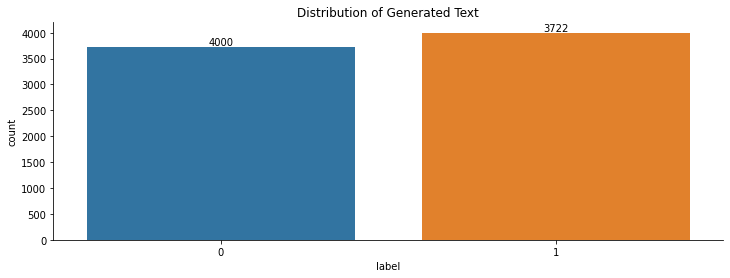

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [4]:
# Shuffling the data
shuffled_data = df.sample(frac=1, random_state=21)

In [5]:
shuffled_data.head()

,essay_set,essay_id,text,label,prompt
4842,1,20,Subject: The Blessings of Technology: A Gift t...,1,You will be provided with a prompt for an essa...
7016,7,44,I remember a time when patience was truly put ...,1,You will be provided with a prompt for an essa...
5724,1,2,"Dear Editor,\nIn recent years, computers have ...",1,You will be provided with a prompt for an essa...
7584,8,12,Laughter: The Unifying Force in Relationships\...,1,You will be provided with a prompt for an essa...
4094,8,22,Title: Laughter as a Bridge: A True Story\n\nL...,1,You will be provided with a prompt for an essa...


### Implementation of TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_data["text"])
Y = shuffled_data["label"]

In [8]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=10)

In [9]:
np.size(y_train)

5791

In [10]:
np.size(y_test)

1931

In [11]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 943
Number of 1s: 988


### Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

In [14]:
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 99.84%
Precision: 99.80%
Recall: 99.90%
F1 Score: 99.85%


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 99.74%
Precision: 99.90%
Recall: 99.60%
F1 Score: 99.75%


In [17]:
# Changing the number of trees and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 99.79%
Precision: 99.70%
Recall: 99.90%
F1 Score: 99.80%


In [21]:
counts = np.bincount(y_pred)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 941
Number of 1s: 990
